# News Classification Project: MN-DS Dataset Exploration

This notebook explores the `MN-DS-news-classification` dataset as part of my thesis project. The goal is to understand the dataset's structure, contents, and suitability for a news classification task.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

## Loading the Dataset

Here, we load the `MN-DS-news-classification` dataset. Update the file path to match the location of your CSV file.

In [2]:
# Load the dataset (replace with your actual file path)
dataset_path = 'MN-DS-news-classification.csv'  # Update this!
df = pd.read_csv(dataset_path)

# Display the first 5 rows
df.head()

,data_id,id,date,source,title,content,author,url,published,published_utc,collection_utc,category_level_1,category_level_2
0,1809,abcnews--2019-10-31--Virginia mom charged with murder in 2-year-old son's death,2019-10-31,abcnews,Virginia mom charged with murder in 2-year-old son's death,The Virginia woman whose 2-year-old son was found in a trash incinerator has been charged with m...,NaN,https://abcnews.go.com/US/wireStory/virginia-mom-charged-murder-year-sons-death-66673986,"Thu, 31 Oct 2019 16:49:56 -0400",1572554996,1572559512,"crime, law and justice",crime
1,1980,abcnews--2019-11-07--2 escaped murder suspects arrested at US-Mexico border,2019-11-07,abcnews,2 escaped murder suspects arrested at US-Mexico border,Authorities are trying to determine if anyone helped two inmates who escaped from a California j...,NaN,https://abcnews.go.com/US/wireStory/escaped-murder-suspects-arrested-us-mexico-border-66811005,"Thu, 07 Nov 2019 00:13:12 -0500",1573103592,1573131986,"crime, law and justice",crime
2,1995,"abcnews--2019-11-07--Family turns in escaped boy, 13, suspected in double murder",2019-11-07,abcnews,"Family turns in escaped boy, 13, suspected in double murder",A 13-year-old suspect in a double homicide who escaped custody has been returned to authorities....,NaN,https://abcnews.go.com/US/wireStory/family-turns-escaped-boy-13-suspected-double-murder-66816971,"Thu, 07 Nov 2019 07:39:54 -0500",1573130394,1573131982,"crime, law and justice",crime
3,2740,abcnews--2019-12-02--Mother charged with murder in deaths of 2 young children,2019-12-02,abcnews,Mother charged with murder in deaths of 2 young children,The mother of two young children found hanging in their Pennsylvania home has been charged with ...,NaN,https://abcnews.go.com/US/wireStory/mother-charged-murder-deaths-young-children-67439903,"Mon, 02 Dec 2019 11:30:59 -0500",1575304259,1575308811,"crime, law and justice",crime
4,7038,ageofautism--2019-04-12--Physician Father and Caretaker of 29 Year Old Autistic Man Found Brutal...,2019-04-12,ageofautism,"Physician, Father and Caretaker of 29 Year Old Autistic Man Found Brutally Murdered","""One family member said Derek “can be violent and has attacked Rex in the past,” court documents...",Age of Autism,http://feedproxy.google.com/~r/ageofautism/~3/zc44EG7xWFM/physician-father-and-caretaker-of-29-y...,2019-04-12 09:00:00+00:00,1555074000,1567543083,"crime, law and justice",crime


## Initial Exploration

Let’s check the dataset’s size, column names, data types, and missing values to get a sense of what we’re working with.

In [3]:
# Check the shape (rows and columns)
print("Dataset Shape:", df.shape)

# List column names
print("Columns:", df.columns.tolist())

# Summary of data types and non-null counts
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (10917, 13)
Columns: ['data_id', 'id', 'date', 'source', 'title', 'content', 'author', 'url', 'published', 'published_utc', 'collection_utc', 'category_level_1', 'category_level_2']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10917 entries, 0 to 10916
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   data_id           10917 non-null  int64 
 1   id                10917 non-null  object
 2   date              10917 non-null  object
 3   source            10917 non-null  object
 4   title             10917 non-null  object
 5   content           10917 non-null  object
 6   author            7605 non-null   object
 7   url               10917 non-null  object
 8   published         10917 non-null  object
 9   published_utc     10917 non-null  int64 
 10  collection_utc    10917 non-null  int64 
 11  category_level_1  10917 non-null  object
 12  category_level_2  10917 non-null  object
dtyp

## Creating a Focused DataFrame

To streamline analysis, we’ll create a new DataFrame containing only the `content` (news text) and `category_level_1` (target labels) columns. This will be the basis for further exploration and modeling.

In [4]:
# Create a new DataFrame with 'content' and 'category_level_1'
df_focused = df[['content', 'category_level_1']].copy()

# Display the first 5 rows of the new DataFrame
df_focused.head()

,content,category_level_1
0,The Virginia woman whose 2-year-old son was found in a trash incinerator has been charged with m...,"crime, law and justice"
1,Authorities are trying to determine if anyone helped two inmates who escaped from a California j...,"crime, law and justice"
2,A 13-year-old suspect in a double homicide who escaped custody has been returned to authorities....,"crime, law and justice"
3,The mother of two young children found hanging in their Pennsylvania home has been charged with ...,"crime, law and justice"
4,"""One family member said Derek “can be violent and has attacked Rex in the past,” court documents...","crime, law and justice"


## Exploring the Focused DataFrame

Let’s examine the new DataFrame to ensure it looks correct and get a deeper look at the `content` and `category_level_1` distributions.

In [5]:
# Check the shape of the new DataFrame
print("Focused DataFrame Shape:", df_focused.shape)

# Check for missing values
print("\nMissing Values:\n", df_focused.isnull().sum())

# Display unique categories and their counts
print("\nUnique Categories (category_level_1):\n", df_focused['category_level_1'].value_counts())

Focused DataFrame Shape: (10917, 2)

Missing Values:
 content             0
category_level_1    0
dtype: int64

Unique Categories (category_level_1):
 category_level_1
society                                      1100
sport                                         907
politics                                      900
conflict, war and peace                       800
religion and belief                           800
science and technology                        800
labour                                        703
health                                        700
education                                     607
environment                                   600
human interest                                600
crime, law and justice                        500
disaster, accident and emergency incident     500
weather                                       400
economy, business and finance                 400
arts, culture, entertainment and media        300
lifestyle and leisure           

## Visualizing Category Distribution

A bar plot will help us see how balanced the `category_level_1` labels are in the focused dataset.

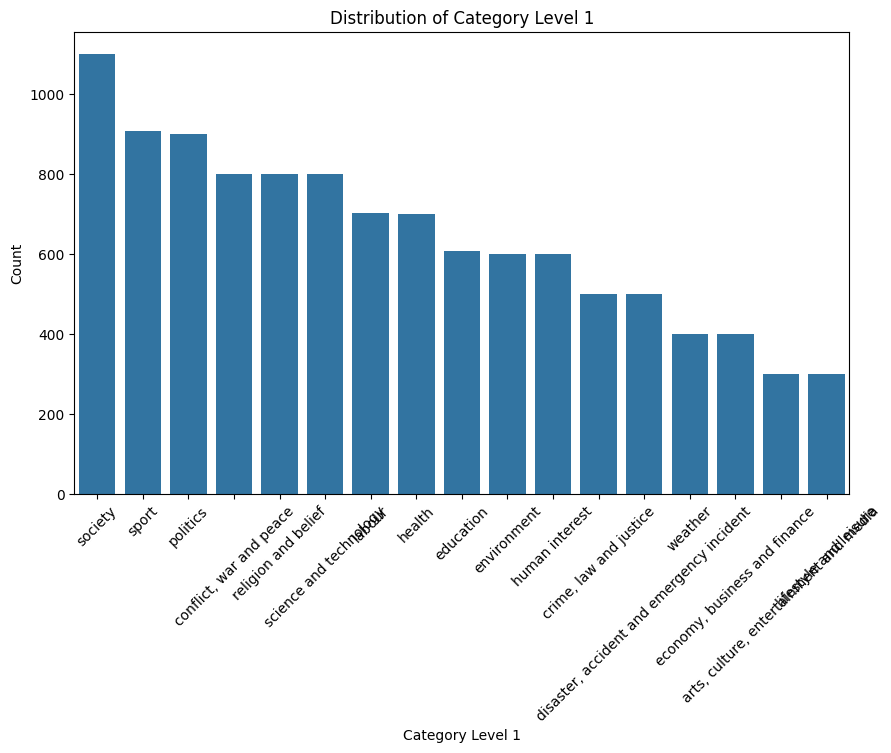

In [6]:
# Visualize the distribution of category_level_1
plt.figure(figsize=(10, 6))
sns.countplot(x='category_level_1', data=df_focused, order=df_focused['category_level_1'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Category Level 1")
plt.xlabel("Category Level 1")
plt.ylabel("Count")
plt.show()


## Sampling Content by Category

Let’s look at a few examples of `content` for each unique `category_level_1` to understand the text data better.

In [7]:
# Get unique categories
unique_categories = df_focused['category_level_1'].unique()

# Display one sample per category
for category in unique_categories:
    sample = df_focused[df_focused['category_level_1'] == category]['content'].iloc[0]
    print(f"Category: {category}")
    print("Content Sample:", sample)
    print("-" * 50)

Category: crime, law and justice
Content Sample: The Virginia woman whose 2-year-old son was found in a trash incinerator has been charged with murder in his death.

Hampton Commonwealth's Attorney Anton Bell told a news conference on Thursday that a warrant had been issued for 34-year-old Julia Leanna Tomlin, who also will be charged with unlawfully disposing of Noah Tomlin's body.

Bell said skull fractures found on the toddler's body indicates a level of force so severe it was as if the child had fallen several stories from a building.

Julia Tomlin reported her son missing in June, and searchers sifted through a landfill and steam plant over 10 days before the body was found on July 3. Tomlin is already jailed and charged with three counts of felony child neglect prior to reporting Noah missing.
--------------------------------------------------
Category: arts, culture, entertainment and media
Content Sample: The  in Hollywood continues to eat itself, as the politically correct cul

##  Full Text Preprocessing

We’ll create a `new_content` column by applying all preprocessing steps to `content` in one function:
- Lowercase the text
- Remove punctuation, numbers, and URLs
- Tokenize into words
- Remove stop words
- Lemmatize tokens
- Join back into a string

This cleaned text will be stored in `new_content` for future use in modeling.

In [8]:
# Import required libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Initialize tools (assuming NLTK downloads are done: punkt, stopwords, wordnet)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define full preprocessing function
def preprocess_text(text):
    # Handle NaN or non-string input
    if not isinstance(text, str):
        return ""
    
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stop words and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Join tokens back into a string
    return ' '.join(cleaned_tokens)

# Apply preprocessing to create 'new_content'
df_focused['new_content'] = df_focused['content'].apply(preprocess_text)

# Display 3 samples to verify
for i in range(3):
    print(f"Sample {i+1}:")
    print("Original:", df_focused['content'].iloc[i])
    print("New Content:", df_focused['new_content'].iloc[i])
    print("Category:", df_focused['category_level_1'].iloc[i])
    print("-" * 50)

Sample 1:
Original: The Virginia woman whose 2-year-old son was found in a trash incinerator has been charged with murder in his death.

Hampton Commonwealth's Attorney Anton Bell told a news conference on Thursday that a warrant had been issued for 34-year-old Julia Leanna Tomlin, who also will be charged with unlawfully disposing of Noah Tomlin's body.

Bell said skull fractures found on the toddler's body indicates a level of force so severe it was as if the child had fallen several stories from a building.

Julia Tomlin reported her son missing in June, and searchers sifted through a landfill and steam plant over 10 days before the body was found on July 3. Tomlin is already jailed and charged with three counts of felony child neglect prior to reporting Noah missing.
New Content: virginia woman whose yearold son found trash incinerator charged murder death hampton commonwealth attorney anton bell told news conference thursday warrant issued yearold julia leanna tomlin also charged 

## Save the preprocessed DataFrame to a CSV file


In [9]:
df_focused.to_csv('MNDS_preprocessed.csv', index=False)
print("Preprocessed DataFrame saved to 'MNDS_preprocessed.csv'")

Preprocessed DataFrame saved to 'MNDS_preprocessed.csv'


## Model Setup: Feature Extraction and Data Split

Before building models, we’ll:
- Convert `new_content` into TF-IDF features for numerical input.
- Split the data into 80% training and 20% testing sets.
- Use these features and splits for all models to ensure fair comparison.

Results (accuracy and time) will be stored for later comparison.

In [10]:
# Import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import time

# Define features (X) and target (y)
X = df_focused['new_content']
y = df_focused['category_level_1']

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency
X_tfidf = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store results
model_results = {}

## Model 1: Naive Bayes

**Why use Naive Bayes?**
- It’s fast and efficient, making it a great baseline for text classification.
- Assumes feature independence (words in `new_content`), which works surprisingly well for text despite not being fully true.
- Handles high-dimensional data (like TF-IDF) effectively with low computational cost.

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Start timing
start_time = time.time()

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_time = time.time() - start_time

# Store results
model_results['Naive Bayes'] = {'accuracy': nb_accuracy, 'time': nb_time}

# Print results
print("Naive Bayes Accuracy:", nb_accuracy)
print("Training Time (seconds):", nb_time)

Naive Bayes Accuracy: 0.6968864468864469
Training Time (seconds): 0.026993513107299805


## Model 2: Support Vector Machine (SVM)

**Why use SVM?**
- Excels at finding optimal boundaries between classes, even in high-dimensional spaces like TF-IDF features.
- Robust to noisy data, which is useful for news text that might have varied styles or outliers.
- Can handle non-linear relationships with a kernel (we’ll use linear for speed, but it’s adaptable).
- Often performs well in text classification tasks, though it’s slower than Naive Bayes.

In [12]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Start timing
start_time = time.time()

# Train SVM model (LinearSVC is faster than SVC with linear kernel)
svm_model = LinearSVC(random_state=42, max_iter=1000)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_time = time.time() - start_time

# Store results
model_results['SVM'] = {'accuracy': svm_accuracy, 'time': svm_time}

# Print results
print("SVM Accuracy:", svm_accuracy)
print("Training Time (seconds):", svm_time)

SVM Accuracy: 0.7614468864468864
Training Time (seconds): 1.4856665134429932


## Model 3: Logistic Regression

**Why use Logistic Regression?**
- Simple yet powerful, providing interpretable probabilities for class predictions.
- Works well with sparse, high-dimensional data like TF-IDF, making it a strong choice for text classification.
- Less prone to overfitting than some complex models, with regularization options built-in (we’ll use default settings here).
- Often competitive with SVM but faster to train, offering a good balance of performance and efficiency.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Start timing
start_time = time.time()

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_time = time.time() - start_time

# Store results
model_results['Logistic Regression'] = {'accuracy': lr_accuracy, 'time': lr_time}

# Print results
print("Logistic Regression Accuracy:", lr_accuracy)
print("Training Time (seconds):", lr_time)

Logistic Regression Accuracy: 0.7664835164835165
Training Time (seconds): 1.9348032474517822


## Model 4: Support Vector Classifier (SVC)

**Why use SVC?**
- Unlike LinearSVC, SVC supports non-linear kernels (we’ll use RBF), potentially capturing complex patterns in text data.
- Good for smaller datasets but slower than LinearSVC due to kernel computations.

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

start_time = time.time()
svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_time = time.time() - start_time

model_results['SVC'] = {'accuracy': svc_accuracy, 'time': svc_time}
print("SVC Accuracy:", svc_accuracy)
print("Training Time (seconds):", svc_time)

SVC Accuracy: 0.7586996336996337
Training Time (seconds): 150.6629331111908


## Model 5: Decision Tree

**Why use Decision Tree?**
- Intuitive and interpretable, splitting data based on feature importance.
- Fast to train and can capture non-linear relationships without kernel tricks.
- Prone to overfitting, but a good baseline for comparison.

In [15]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_time = time.time() - start_time

model_results['Decision Tree'] = {'accuracy': dt_accuracy, 'time': dt_time}
print("Decision Tree Accuracy:", dt_accuracy)
print("Training Time (seconds):", dt_time)

Decision Tree Accuracy: 0.5334249084249084
Training Time (seconds): 10.565340042114258


## Model 6: Random Forest

**Why use Random Forest?**
- Ensemble of Decision Trees, reducing overfitting via averaging.
- Robust and often outperforms single trees in accuracy.
- Slower than a single tree but still efficient for text classification.

In [16]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_time = time.time() - start_time

model_results['Random Forest'] = {'accuracy': rf_accuracy, 'time': rf_time}
print("Random Forest Accuracy:", rf_accuracy)
print("Training Time (seconds):", rf_time)

Random Forest Accuracy: 0.7078754578754579
Training Time (seconds): 31.194108486175537


## Model 7: K-Nearest Neighbors (KNN)

**Why use KNN?**
- Simple, distance-based approach that classifies based on nearest neighbors.
- No training phase (lazy learner), but prediction can be slow on large datasets.
- Works well with clear clusters, though text data might be less ideal.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_time = time.time() - start_time

model_results['KNN'] = {'accuracy': knn_accuracy, 'time': knn_time}
print("KNN Accuracy:", knn_accuracy)
print("Training Time (seconds):", knn_time)

KNN Accuracy: 0.6790293040293041
Training Time (seconds): 1.1353425979614258


## Model 8: Gaussian Naive Bayes

**Why use GaussianNB?**
- Assumes continuous data (we’ll adapt TF-IDF to dense format), unlike MultinomialNB.
- Fast and simple, but might underperform on sparse text features.

In [18]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train.toarray(), y_train)  # Convert sparse TF-IDF to dense
y_pred_gnb = gnb_model.predict(X_test.toarray())
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
gnb_time = time.time() - start_time

model_results['GaussianNB'] = {'accuracy': gnb_accuracy, 'time': gnb_time}
print("GaussianNB Accuracy:", gnb_accuracy)
print("Training Time (seconds):", gnb_time)

GaussianNB Accuracy: 0.4926739926739927
Training Time (seconds): 1.8341362476348877


## Model 9: Bernoulli Naive Bayes

**Why use BernoulliNB?**
- Designed for binary features (e.g., word presence/absence), adapting TF-IDF to binary form.
- Fast and lightweight, good for text with strong presence-based signals.

In [19]:
from sklearn.naive_bayes import BernoulliNB

start_time = time.time()
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)
y_pred_bnb = bnb_model.predict(X_test)
bnb_accuracy = accuracy_score(y_test, y_pred_bnb)
bnb_time = time.time() - start_time

model_results['BernoulliNB'] = {'accuracy': bnb_accuracy, 'time': bnb_time}
print("BernoulliNB Accuracy:", bnb_accuracy)
print("Training Time (seconds):", bnb_time)

BernoulliNB Accuracy: 0.5554029304029304
Training Time (seconds): 0.043074607849121094


## Model Comparison

We’ve trained nine supervised learning models to predict `category_level_1`:
- Naive Bayes (MultinomialNB, GaussianNB, BernoulliNB)
- SVM variants (LinearSVC, SVC)
- Logistic Regression
- Decision Tree
- Random Forest
- K-Nearest Neighbors (KNN)

Below, we’ll create a DataFrame to compare their:
- **Accuracy**: Performance on the test set.
- **Training Time**: Time taken to train (in seconds).

This will help identify the best model for our news classification task.

Model Comparison:
                     Accuracy  Training Time (s)
Logistic Regression    0.7665               1.93
SVM                    0.7614               1.49
SVC                    0.7587             150.66
Random Forest          0.7079              31.19
Naive Bayes            0.6969               0.03
KNN                    0.6790               1.14
BernoulliNB            0.5554               0.04
Decision Tree          0.5334              10.57
GaussianNB             0.4927               1.83


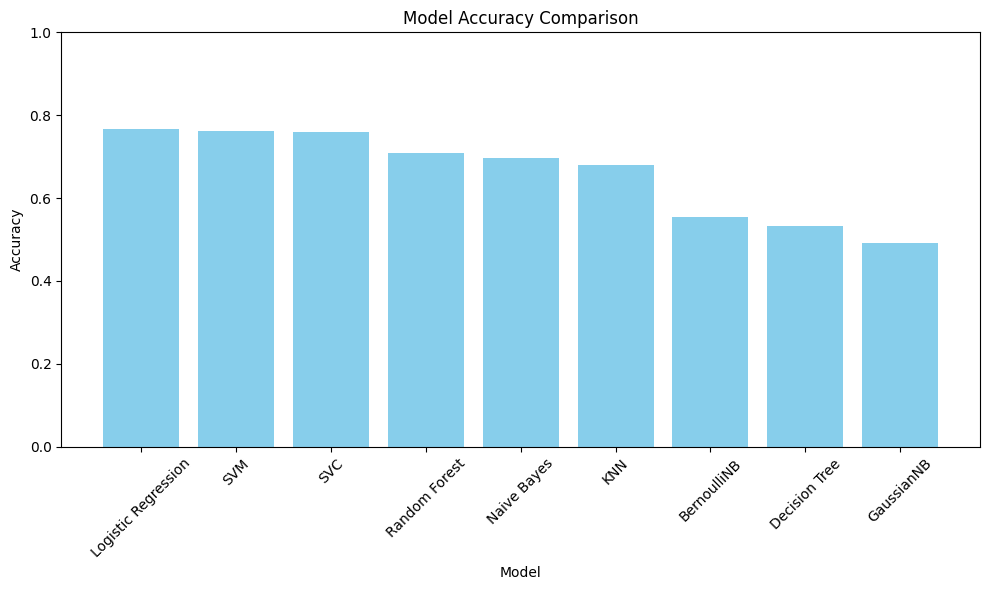

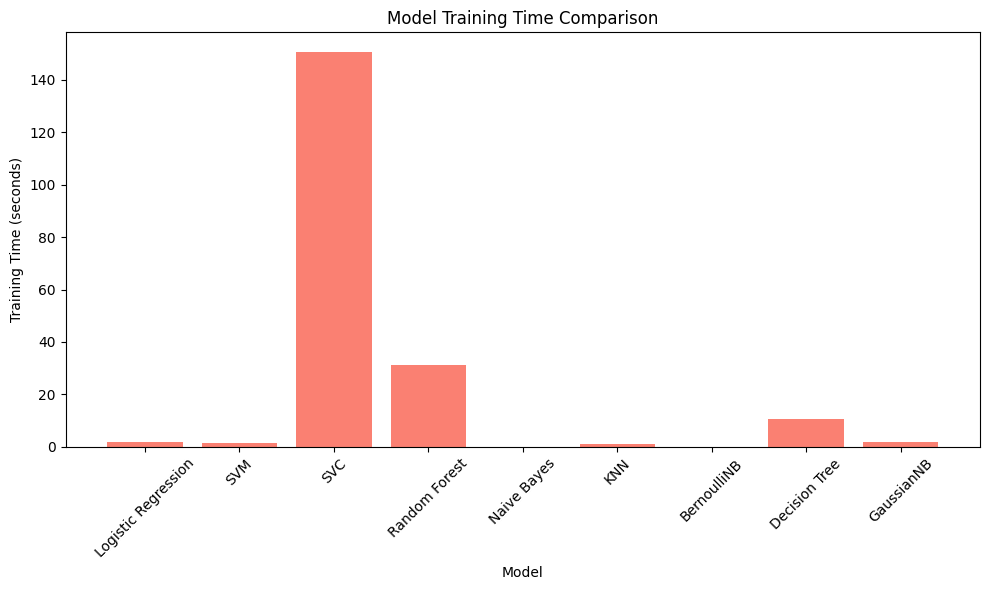

In [20]:
# Import pandas if not already imported
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame from model_results
comparison_df = pd.DataFrame(model_results).T  # Transpose to have models as rows
comparison_df.columns = ['Accuracy', 'Training Time (s)']

# Round numbers for readability
comparison_df['Accuracy'] = comparison_df['Accuracy'].round(4)
comparison_df['Training Time (s)'] = comparison_df['Training Time (s)'].round(2)

# Sort by accuracy (descending)
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)

# Display the DataFrame
print("Model Comparison:")
print(comparison_df)

# Bar plot for accuracy
plt.figure(figsize=(10, 6))
plt.bar(comparison_df.index, comparison_df['Accuracy'], color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for training time
plt.figure(figsize=(10, 6))
plt.bar(comparison_df.index, comparison_df['Training Time (s)'], color='salmon')
plt.title('Model Training Time Comparison')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Prediction with Best Model: Logistic Regression

**Why Logistic Regression?**
- Achieved the highest accuracy (0.7665) with a reasonable training time (1.77s) among tested models.
- Provides reliable predictions with interpretable probabilities, ideal for news classification.

We’ll use the trained Logistic Regression model to predict `category_level_1` for new text inputs. New text will be preprocessed (lowercase, clean, tokenize, remove stop words, lemmatize) to match `new_content`.

In [21]:
# Test with example inputs
test_texts = []

In [22]:
text = input("please input your news to predict.")
test_texts.append(text)

In [23]:
# Import required libraries (assuming already imported earlier)
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Reinitialize tools (if not still in memory)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define preprocessing function (same as before)
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(cleaned_tokens)

# Assuming vectorizer and lr_model are still in memory from earlier
# If not, retrain or reload them:
# vectorizer = TfidfVectorizer(max_features=5000)
# X_tfidf = vectorizer.fit_transform(df_focused['new_content'])
# lr_model = LogisticRegression(random_state=42, max_iter=1000)
# lr_model.fit(X_train, y_train)

# Prediction function
def predict_category(text, model, vectorizer):
    # Preprocess the input text
    cleaned_text = preprocess_text(text)
    # Transform using the same TF-IDF vectorizer
    text_tfidf = vectorizer.transform([cleaned_text])
    # Predict category
    prediction = model.predict(text_tfidf)[0]
    # Get prediction probability (optional)
    prob = model.predict_proba(text_tfidf)[0].max()
    return prediction, prob



for i, text in enumerate(test_texts, 1):
    pred_category, pred_prob = predict_category(text, lr_model, vectorizer)
    print(f"Test {i}:")
    print("Input:", text)
    print("Predicted Category:", pred_category)
    print("-" * 50)

Test 1:
Input: 
Predicted Category: society
--------------------------------------------------


In [24]:
text = input("please input your news to predict.")
test_texts.append(text)

for i, text in enumerate(test_texts, 1):
    pred_category, pred_prob = predict_category(text, lr_model, vectorizer)
    print(f"Test {i}:")
    print("Input:", text)
    print("Predicted Category:", pred_category)
    print("-" * 50)

Test 1:
Input: 
Predicted Category: society
--------------------------------------------------
Test 2:
Input: 
Predicted Category: society
--------------------------------------------------
